# evaluating logistic regression model on raw data

**Task:** Choose any 2 (different) dimensionality reduction techniques and train the above pipeline model using those versions of the make_classification data. Create a plot using pyplot or pandas comparing the results on the original data with all 4 Dimensionality Reduction techniques.

In [284]:
import sklearn
import numpy
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

# synthetic classification dataset
from sklearn.datasets import make_classification

# importing pandas for plot
import matplotlib.pyplot as plt

print(".")

.


In [285]:
#define dataset
# 1000 samples, 20 features, 10 informative features, 10 redundant features
# X is the generated samples (each having 20 features)
# y is the integer label of class membership of each sample
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)

#summarize the dataset
print(X.shape, y.shape)
print(type(X))

(1000, 20) (1000,)
<class 'numpy.ndarray'>


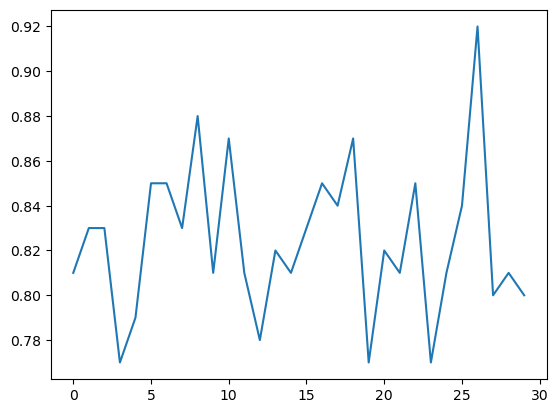

Accuracy: 0.824 (0.034)


In [286]:
#evaluating logistic regression model after each dimensionality reduction transform
#evaluated using standard 10-fold cross-validation
#define the model
model = LogisticRegression()

#evaluate model
# nsplits number of folds, nrepeats number of times to repeat
# random states is amount of states generated in each repetition
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

plt.plot(n_scores)
plt.show()


#report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [287]:
#evaluating pca with logistic regression algorithm for classification
#combine the data transform and model into atomic unit
#which can be evaluated using the cross-validation procedure
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
print(".")

.


In [288]:
#define pipeline
# at least (n_components = 5) features will be restored
# the model is LogisticRegression()
steps = [('pca', PCA(n_components=5)), ('m', LogisticRegression())]
model1 = Pipeline(steps=steps)

#evaluate model
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats=3, random_state=1)
n_scores1 = cross_val_score(model1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)


#report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores1), std(n_scores1)))

Accuracy: 0.816 (0.037)


In [289]:
#evaluating lda with logistic regression algorithm for classifciation
#complete example of evaluating model with SVD dimensionality reduction
from sklearn.decomposition import TruncatedSVD
print(".")

.


In [290]:
#define pipeline
steps = [('svd', TruncatedSVD(n_components=5)), ('m', LogisticRegression())]
model2 = Pipeline(steps=steps)

#evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores2 = cross_val_score(model2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

#report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores2), std(n_scores2)))

Accuracy: 0.814 (0.036)


In [291]:
#using python libraries to import two more models
#method 3: using locally linear embedding to train model
from sklearn.manifold import LocallyLinearEmbedding
print(".")

.


In [292]:
#define pipeline
steps = [('lle', LocallyLinearEmbedding(n_components=5)), ('m', LogisticRegression())]
model3 = Pipeline(steps=steps)

#evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores3 = cross_val_score(model3, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

#report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores3), std(n_scores3)))

Accuracy: 0.857 (0.032)


In [293]:
#method 4: using sparse random projection
from sklearn.random_projection import SparseRandomProjection
print(".")

.


In [294]:
#define pipeline
steps = [('spr', SparseRandomProjection(n_components=5)), ('m', LogisticRegression())]
model4 = Pipeline(steps=steps)

#evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores4 = cross_val_score(model4, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

#report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores4), std(n_scores4)))

Accuracy: 0.781 (0.046)


mean and standard deviation of
logistic regression: 0.824 (0.034)
principle component analysis: 0.816 (0.037)
truncated singular value decomposition: 0.814 (0.036)
locally linear embedding: 0.857 (0.032)
sparse random projection: 0.781 (0.046)


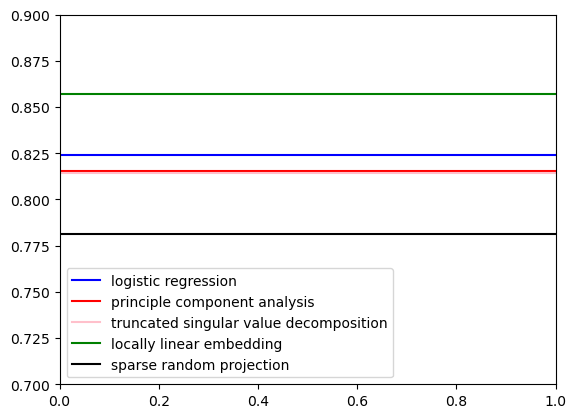

In [295]:
#print accuracy for each technique used to train model
print('mean and standard deviation of')
print('logistic regression: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('principle component analysis: %.3f (%.3f)' % (mean(n_scores1), std(n_scores1)))
print('truncated singular value decomposition: %.3f (%.3f)' % (mean(n_scores2), std(n_scores2)))
print('locally linear embedding: %.3f (%.3f)' % (mean(n_scores3), std(n_scores3)))
print('sparse random projection: %.3f (%.3f)' % (mean(n_scores4), std(n_scores4)))

#plot accuracy comparing all four techniques used on logistic regression
plt.axhline(y=mean(n_scores), label = "logistic regression", color = "blue")
plt.axhline(y=mean(n_scores1), label = "principle component analysis", color = "red")
plt.axhline(y=mean(n_scores2), label = "truncated singular value decomposition", color = "pink")
plt.axhline(y=mean(n_scores3), label = "locally linear embedding", color = "green")
plt.axhline(y=mean(n_scores4), label = "sparse random projection", color = "black")
plt.gca().set_ylim([.7,.9]) # scale y axis
plt.legend()
plt.show() #locally linear embedding achieved the greatest accuracy for this model